### Text Processing

In [102]:
import pympi    # Import pympi to work with elan files
import string
import glob

rd = "data/Komnzo-ELAN_files"
fn = "data/Komnzo-ELAN_files/tci20110810CDa-01.eaf"
eafob = pympi.Elan.Eaf(fn)


In [131]:
# Print out tiers words from Elan files
def list_elan_tiers(rd):
    for file_path in glob.glob((rd + '/*.eaf')): #.format(corpus_root)):
        eafob = pympi.Elan.Eaf(file_path)
        print(file_path)
        print(eafob.get_tier_names())
        print("\n")


def elan_to_words(rd,stop_words=None,tier=None):
    if stop_words is None:
        stop_words = string.punctuation

    if tier is None:
        tier = ['words']
        
    # Initialize the frequency dictionary
    frequency_dict = {}

    for file_path in glob.glob((rd + '/*.eaf')): #.format(corpus_root)):
        eafob = pympi.Elan.Eaf(file_path)

        # Loop over all the defined tiers that contain orthography
        for ort_tier in tier:
            
            # If the tier is not present in the elan file spew an error and
            # continue. This is done to avoid possible KeyErrors
            if ort_tier not in eafob.get_tier_names():
                print('WARNING!!!')
                print('One of the ortography tiers is not present in the elan file')
                print('namely: {}. skipping this one...'.format(ort_tier))
                
            # If the tier is present we can loop through the annotation data
            else:
                for annotation in eafob.get_annotation_data_for_tier(ort_tier):
                    # We are only interested in the utterance

                    utterance = annotation[2]

                    # Split, by default, splits on whitespace thus separating words
                    words = utterance.split()

                    # For every word increment the frequency
                    for word in words:
                        # Remove the possible punctuation
                        for char in stop_words:
                            word = word.replace(char, '')

                        # Convert to lowercase                    
                        word = word.lower()

                        # Increment the frequency, using the get method we can
                        # avoid KeyErrors and make sure the word is added when it
                        # wasn't present in the frequency dictionary
                        frequency_dict[word] = frequency_dict.get(word, 0) + 1
                        
    return frequency_dict

def write_word_to_txt(freq,fname="unique_words.txt"):
    with open(fname, 'w') as f_:
        kk = list(freq.keys())
        kk = sorted(kk)
        for k in kk:
            print(k, file=f_)
            

In [130]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
frequency_dict

{'nzone': 141,
 'yf': 133,
 'rä': 564,
 'abia': 1,
 'nzä': 212,
 'worä': 47,
 'rokuma': 1,
 'ŋafe': 59,
 'bäi': 29,
 'trikasi': 110,
 'bänema': 127,
 'kwa': 835,
 'natrikwé': 6,
 'kabe': 368,
 'tnz': 33,
 'sfrärm': 87,
 '...': 493,
 'kukufia': 11,
 'mane': 811,
 'yara': 149,
 'masun': 21,
 'swamnzrm': 31,
 'nafane': 258,
 'ŋare': 141,
 'edawä': 38,
 'nä': 654,
 'kayé': 138,
 'zä': 206,
 'we': 601,
 'rokun': 2,
 'en..': 1,
 'näbi': 95,
 'ŋarekarä': 13,
 'fi': 544,
 'zefara': 18,
 'bi': 29,
 'farsir': 2,
 'karesa': 31,
 'zfth': 34,
 'kar': 166,
 'watik': 660,
 'zfthen': 21,
 'bä': 395,
 'bsfrärm': 2,
 'nagayé': 65,
 'zbo': 247,
 'thgathinzako': 1,
 'madma': 6,
 'kafarwä': 7,
 'a': 122,
 'srak': 58,
 'nge': 173,
 'katanwä': 1,
 'okay': 70,
 'zenfara': 9,
 'kofär': 5,
 'ŋarsfo': 8,
 'zärsöftha': 2,
 'gardame': 13,
 'rafisir': 1,
 'kofä': 101,
 'thoraksir': 6,
 'gäw': 3,
 'rusima': 1,
 'ane': 1442,
 'entharukwr': 1,
 'krentharuf': 1,
 'krenfar': 4,
 'ŋanrafinzr': 1,
 'e': 219,
 'mnzärfr': 3

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


freq = list(frequency_dict.values())
freq = freq(freq>1)
mybar = plt.bar(range(len(freq)), freq, color='green', alpha=0.4)



TypeError: '>' not supported between instances of 'list' and 'int'

In [167]:
import pandas as pd
df = pd.DataFrame(list(frequency_dict.items()), columns=['Words', 'Count'])
df.count()

Words    9728
Count    9728
dtype: int64

Words    3725
Count    3725
dtype: int64


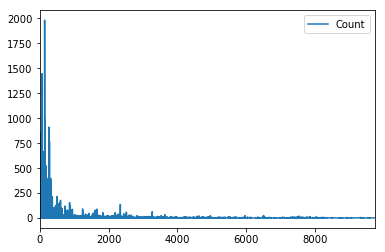

In [177]:
df_freq = df[df.Count>1]
print(df_freq.count())
df_freq.plot()

In [171]:
# plot zipf histogram - long tail distribution

# distribution of word length

# distribution of character grapheme system

# distribution of male - female
# co-occurance - use word2vec to train


Words    6003
Count    6003
dtype: int64

### Konzo Language

In [133]:
elan_folder = "data/Komnzo-ELAN_files"
list_elan_tiers(elan_folder)

data/Komnzo-ELAN_files/tci20100905CDa.eaf
dict_keys(['tx@ABB', 'mb@ABB', 'gl@ABB', 'ft@ABB', 'cm@ABB', 'pos@ABB', 'words'])


data/Komnzo-ELAN_files/tci20110802CDa.eaf
dict_keys(['tx@ABB', 'mb@ABB', 'gl@ABB', 'ft@ABB', 'cm@ABB', 'pos@ABB', 'words'])


data/Komnzo-ELAN_files/tci20110810CDa-01.eaf
dict_keys(['tx@MAB', 'mb@MAB', 'gl@MAB', 'ft@MAB', 'cm@MAB', 'pos@MAB', 'words'])


data/Komnzo-ELAN_files/tci20110810CDa-02.eaf
dict_keys(['tx@MAB', 'mb@MAB', 'gl@MAB', 'ft@MAB', 'cm@MAB', 'tx@CD', 'ft@CD', 'cm@CD', 'words'])


data/Komnzo-ELAN_files/tci20110813CDa-09.eaf
dict_keys(['tx@CD', 'tx@DAK', 'mb@DAK', 'gl@DAK', 'ft@DAK', 'cm@DAK', 'ft@CD', 'cm@CD', 'pos@DAK', 'words'])


data/Komnzo-ELAN_files/tci20110817CDa-02.eaf
dict_keys(['tx@ABB', 'mb@ABB', 'ft@ABB', 'cm@ABB', 'gl@ABB', 'pos@ABB', 'words'])


data/Komnzo-ELAN_files/tci20111004CDa.eaf
dict_keys(['tx@RMA', 'mb@RMA', 'ft@RMA', 'cm@RMA', 'tx@TSA', 'ft@TSA', 'cm@TSA', 'tx@CD', 'ft@CD', 'cm@CD', 'mb@TSA', 'tx@MAE', 'ft@MAE', 'cm@MAE',

data/Komnzo-ELAN_files/tci20130907CDv-02.eaf
dict_keys(['RNA@tx', 'RNA@mb', 'RNA@gl', 'RNA@ft', 'RNA@ortho', 'RNA@cm', 'CD@tx', 'CD@ft', 'CD@cm', 'JAA@tx', 'JAA@mb', 'JAA@gl', 'JAA@ft', 'JAA@ortho', 'JAA@cm', 'words'])


data/Komnzo-ELAN_files/tci20130911JMv-03.eaf
dict_keys(['tx@MBR', 'mb@MBR', 'gl@MBR', 'ft@MBR', 'cm@MBR', 'tx@CD', 'ft@CD', 'cm@CD', 'pos@MBR', 'words'])


data/Komnzo-ELAN_files/tci20130914CDv-01.eaf
dict_keys(['tx@KAB', 'mb@KAB', 'gl@KAB', 'ft@KAB', 'cm@KAB', 'tx@CD', 'ft@CD', 'cm@CD', 'pos@KAB', 'words'])


data/Komnzo-ELAN_files/tci20130923CDa-01.eaf
dict_keys(['tx@ALB', 'mb@ALB', 'gl@ALB', 'ft@ALB', 'cm@ALB', 'tx@CD', 'ft@CD', 'cm@CD', 'pos@ABB', 'words'])


data/Komnzo-ELAN_files/tci20130927CDv-06.eaf
dict_keys(['tx@MAB', 'mb@MAB', 'gl@MAB', 'ft@MAB', 'cm@MAB', 'tx@CD', 'ft@CD', 'cm@CD', 'tx@CAM', 'mb@CAM', 'gl@CAM', 'ft@CAM', 'cm@CAM', 'words'])


data/Komnzo-ELAN_files/tci20131004CDv-05.eaf
dict_keys(['tx@RNA', 'mb@RNA', 'gl@RNA', 'ft@RNA', 'cm@RNA', 'tx@CD', '

In [98]:
elan_folder = "data/Komnzo-ELAN_files"
words = elan_to_words(elan_folder)

txt_file = "data/Komnzo_words.txt"
write_word_to_txt(words, txt_file)


### ABUI Language

#### Atimelang Dialect

In [132]:
elan_folder = "data/Abui_Audio_Corpus/Atimelang_dialect/Narratives"
words = elan_to_words(elan_folder, None, ['Unspecified'])

txt_file = "data/Abui_Audio_Corpus/ABUI_Atimelang_words.txt"
write_word_to_txt(words, txt_file)


WARNING!!!
One of the ortography tiers is not present in the elan file
namely: Unspecified. skipping this one...


In [122]:
list_elan_tiers(elan_folder)

data/Abui_Audio_Corpus/Atimelang_dialect/Narratives/B10h28m14s30apr2008 mono.eaf
dict_keys(['Turns', 'Unspecified', 'Sections'])


data/Abui_Audio_Corpus/Atimelang_dialect/Narratives/B10h41m08s30apr2008HuntersAndCrocodiles.eaf
dict_keys(['Turns', 'Unspecified', 'Sections'])


data/Abui_Audio_Corpus/Atimelang_dialect/Narratives/B10h54m13s30apr2008 mono.eaf
dict_keys(['Turns', 'Unspecified', 'Sections'])


data/Abui_Audio_Corpus/Atimelang_dialect/Narratives/B14h38m09s30apr2008 mono.eaf
dict_keys(['Abui-cp', 'tx', 'fte', 'ftr'])


